In [31]:
# start by importing our usual things
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Just for fun, in case you missed it at the end of the notes of last week
* if you downloaded image #2 from last week (or "Image example" from this week), it should be in your downloads directory
* This shows how smoothing might look on another 2D image

In [40]:
# note, need this for re-running, not for first time
plt.style.use("classic")

# just for fun (and to see the comparitive effects of smoothing):
import PIL.Image as Image
import PIL.ImageFilter as ImageFilter
import matplotlib.pyplot as plt
im = Image.open("/Users/jillnaiman1/Downloads/littleCorgiInHat.png", "r")

import ipywidgets

@ipywidgets.interact(radius=(1,100,5))
def make_plot(radius):
    myFilter = ImageFilter.GaussianBlur(radius=radius)
    smoothed_image = im.filter(myFilter)

    # plot originonal image
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(im)
    ax[1].imshow(smoothed_image)

# note how pixelated the last image becomes
#  the upshot is that when we give up detail we 
#  can then remap our data onto a larger grid
#  if we set radius == 100, we can almost 
#  represent our little corgi with a single
#  pixel at 1 color
# Something to consider going forward

interactive(children=(IntSlider(value=46, description='radius', min=1, step=5), Output()), _dom_classes=('widg…

## Affline Transformations - Quick examples
* We'll just do a quick example on a more complex case => image manipulation
* The references are: https://stackoverflow.com/questions/7501009/affine-transform-in-pil-python and https://stackoverflow.com/questions/17056209/python-pil-affine-transformation

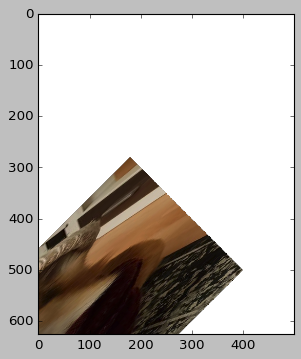

In [41]:
from affline_transformation import ScaleRotateTranslate

# do 1 at a time
angle = 45 # degrees
newCenter = (400,500)
oldCenter = im.size
scale = (2, 0.5)
newImage = ScaleRotateTranslate(im, angle, center=oldCenter, new_center=newCenter, scale=scale)


fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(newImage)


## Looking at matplotlib colormaps

In [42]:
# lets import the color maps from matplotlib
import matplotlib.cm as cm

In [46]:
# we're going to set our figure sizes for all our plots
plt.rcParams["figure.figsize"] = (12, 10)
# again, make our figures larger, 100 is probably better for presenting
plt.rcParams["figure.dpi"] = 200
# we're going to use a bunch of seaborn figure 
#  defaults for niceness
plt.style.use("seaborn")

FYI: viridis is the new default colormap in matplotlib.  For a great description of how this was developed and why, see Stefan Van der Walt's [talk from SciPy 2015](https://www.youtube.com/watch?v=xAoljeRJ3lU).

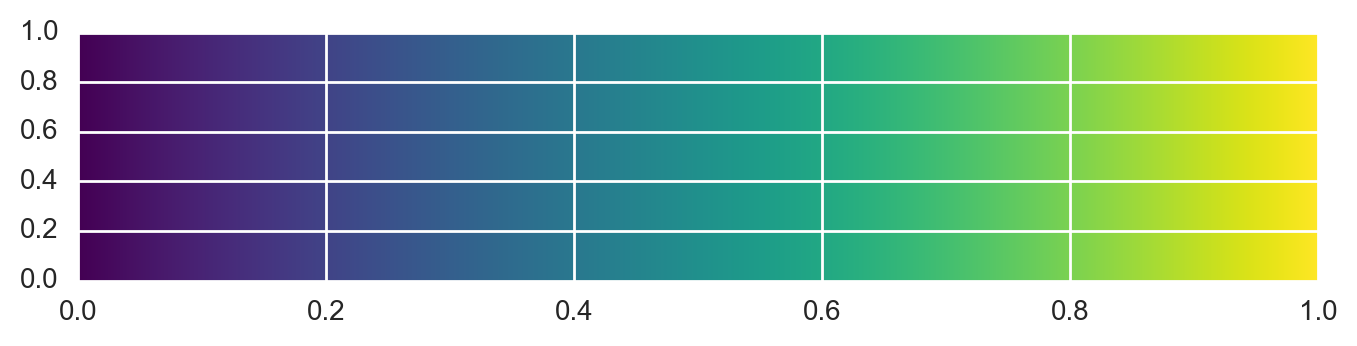

In [47]:
# (0) first off we are going to make use of mgrid in numpy
#  what on earth is that?
np.mgrid?
np.mgrid[0:5]
# we can also specify steps
np.mgrid[0:5:10j]
# so, now we see our numbers are going still
#  from 0-5 but in 2x as many steps
#  "10j" is a way of specifing number of steps
# usually we want to map from 0-255 colors, so we
#  can use
np.mgrid[0.0:1.0:256j]


# (1) grab the viridis RGB colors
viridis = cm.viridis(np.mgrid[0.0:1.0:256j]) # gives the whole RGBA
viridis = cm.viridis(np.mgrid[0.0:1.0:256j])[:,:3] # grabs just RGB
# what does this look like?
viridis

# (2) lets make a visualization of this colormap
# lets make an image that is 256 X 256 pixels in shape
im = np.ones((viridis.shape[0], viridis.shape[0], 4))
# this is just a place holder to store RGBA values for 
# each pixel of our image
#  again the "A" is just a measure of transparency
im

# (3) now, lets fill our image
# the im[...,:3] just pulls out the RGB sections
# of our array and does not select the A values
# the viridis[None,:,:] was just fancy formatting
#  not necessary, simplier:
im[...,:3] *= viridis
im

# (4) now you'll notice that the values of 
#    RGB go from 0->1 instead of 0->255
#    we can change this if we want to like so:
#im *= 255
#im = im.astype("uint8")

# or we can just plot the thing!
plt.imshow(im, extent = [0.0, 1.0, 0.0, 1.0], aspect = 1.0/5)

# note here that the axis are meaningless => just a way to 
#  spread out what our colormap looks like

In [48]:
# we can visualize a few colormaps this way using widgets if 
#  we want to take a quick look at a few
import ipywidgets

@ipywidgets.interact(cmap=cm.cmap_d)
def make_plot(cmap):
    mymap = cmap(np.mgrid[0.0:1.0:256j])[:,:3]
    im = np.ones((mymap.shape[0], mymap.shape[0], 4))
    im[...,:3] *= mymap
    plt.imshow(im, extent = [0.0, 1.0, 0.0, 1.0], aspect = 1.0/5)



interactive(children=(Dropdown(description='cmap', options={'Blues': <matplotlib.colors.LinearSegmentedColorma…